In [8]:
import numpy as np
import pandas as pd

导入ca_list_copy.csv文件到DataFrame中，实现以下操作:
对异常数据(数值为0)进行值替换，替换为当前列的平均值;
对zwyx列的数据进行平均值统计，其他列做计数统计(提示使用 value_counts());
得到zwmc字段的唯一值列表;
通过group函数，实现对于dd字段的分组，并按照城市计算每个城市的最大 薪资，使用折线图，显示Top10城市。

In [9]:
ca=pd.read_csv('data/ca_list_copy.csv')
ca

,Id,zwmc,gsmc,dd,gsxz,gsgm,zwyx,xl,jy
0,1,数据分析师,山东半亩花田生物科技有限公司,济南,民营,100-499人,4500.0,大专,1-3年
1,2,数据分析师,智联招聘,天津,上市公司,1000-9999人,0.0,本科,无经验
2,3,数据分析师,捷信中国,天津,外商独资,10000人以上,0.0,本科,1-3年
3,4,中/高级数据分析师,宽拓(北京)科技有限公司,北京,民营,20-99人,17500.5,本科,3-5年
4,5,6k聘金融数据分析师/助理/交易分析师（五险双休,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.5,本科,无经验
5,6,证券分析师、助理、数据分析,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.5,本科,无经验
6,7,--集团公司登入世界第一屏纳斯达克-万向联合聘金融数据分析师,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,12500.5,大专,无经验
7,8,数据分析师,北京创先策略信息咨询有限公司,北京,民营,20人以下,5000.5,本科,无经验
8,9,BI分析师助理/数据分析师助理税后月薪5500，包吃，房补,佛山市好金企业管理信息咨询有限公司,广州,民营,20-99人,5000.5,大专,无经验
9,10,6000-15000金融数据分析师/交易员 五险一金+实习生+弹性时间,北京华中投资有限公司,北京,股份制企业,100-499人,0.0,本科,无经验


In [15]:
#对异常数据(数值为0)进行值替换，替换为当前列的平均值;
ca['zwyx'].mean()
cas=ca.replace({0.0:ca['zwyx'].mean()})
cas

,Id,zwmc,gsmc,dd,gsxz,gsgm,zwyx,xl,jy
0,1,数据分析师,山东半亩花田生物科技有限公司,济南,民营,100-499人,4500.000000,大专,1-3年
1,2,数据分析师,智联招聘,天津,上市公司,1000-9999人,8152.994976,本科,无经验
2,3,数据分析师,捷信中国,天津,外商独资,10000人以上,8152.994976,本科,1-3年
3,4,中/高级数据分析师,宽拓(北京)科技有限公司,北京,民营,20-99人,17500.500000,本科,3-5年
4,5,6k聘金融数据分析师/助理/交易分析师（五险双休,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.500000,本科,无经验
5,6,证券分析师、助理、数据分析,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.500000,本科,无经验
6,7,--集团公司登入世界第一屏纳斯达克-万向联合聘金融数据分析师,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,12500.500000,大专,无经验
7,8,数据分析师,北京创先策略信息咨询有限公司,北京,民营,20人以下,5000.500000,本科,无经验
8,9,BI分析师助理/数据分析师助理税后月薪5500，包吃，房补,佛山市好金企业管理信息咨询有限公司,广州,民营,20-99人,5000.500000,大专,无经验
9,10,6000-15000金融数据分析师/交易员 五险一金+实习生+弹性时间,北京华中投资有限公司,北京,股份制企业,100-499人,8152.994976,本科,无经验


In [45]:
aa=cas['gsmc'].value_counts()
aaa=pd.DataFrame(aa)
aaa.columns=['value']
aaa.loc['北京万向通汇投资有限公司']

value    862
Name: 北京万向通汇投资有限公司, dtype: int64

In [46]:
#对zwyx列的数据进行平均值统计，其他列做计数统计(提示使用 value_counts());
print("zwyx平均值",ca.zwyx.mean())
#cas['zwmc'].value_counts()
#cas['gsmc'].value_counts()
col=list(cas.columns)
col.remove("Id")
col.remove('zwyx')
col

new_df=pd.DataFrame()
for i in col:
    result=cas[i].value_counts()
    re=pd.DataFrame(result)
    re.columns=['values']
    # 合并两个df
    new_df=pd.concat([new_df,re])
    
new_df

zwyx平均值 8152.994976359338


,values
数据分析师,216
高薪加五险 诚聘金融数据分析师/分析助理/操盘手/交易员,24
大数据分析师,23
SEM医疗竞价专员,19
7K大数据开发与维护,19
呼叫中心数据分析师,18
数据分析助理、五险一金+提成+两人间住宿,15
成功人总把复杂的事情简单化诚聘数据分析师月薪1W+,15
金融数据分析师,14
数据分析师（应届生亦可）160810,14


In [21]:
cas

,Id,zwmc,gsmc,dd,gsxz,gsgm,zwyx,xl,jy
0,1,数据分析师,山东半亩花田生物科技有限公司,济南,民营,100-499人,4500.000000,大专,1-3年
1,2,数据分析师,智联招聘,天津,上市公司,1000-9999人,8152.994976,本科,无经验
2,3,数据分析师,捷信中国,天津,外商独资,10000人以上,8152.994976,本科,1-3年
3,4,中/高级数据分析师,宽拓(北京)科技有限公司,北京,民营,20-99人,17500.500000,本科,3-5年
4,5,6k聘金融数据分析师/助理/交易分析师（五险双休,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.500000,本科,无经验
5,6,证券分析师、助理、数据分析,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,9000.500000,本科,无经验
6,7,--集团公司登入世界第一屏纳斯达克-万向联合聘金融数据分析师,北京万向联合控股集团有限公司,北京,股份制企业,100-499人,12500.500000,大专,无经验
7,8,数据分析师,北京创先策略信息咨询有限公司,北京,民营,20人以下,5000.500000,本科,无经验
8,9,BI分析师助理/数据分析师助理税后月薪5500，包吃，房补,佛山市好金企业管理信息咨询有限公司,广州,民营,20-99人,5000.500000,大专,无经验
9,10,6000-15000金融数据分析师/交易员 五险一金+实习生+弹性时间,北京华中投资有限公司,北京,股份制企业,100-499人,8152.994976,本科,无经验


In [66]:
#得到zwmc字段的唯一值列表;
print(len(cas.zwmc))
unique_zwmc=cas.zwmc.unique().tolist()
print(len(unique_zwmc))

3384
1800


/Users/hushiwei/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


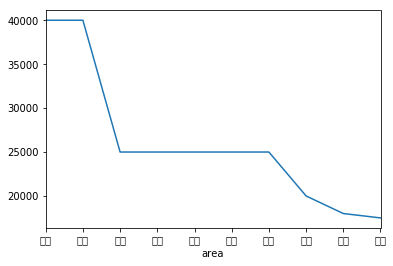

In [69]:
import matplotlib.pyplot as plt
import matplotlib as mpl


#通过group函数，实现对于dd字段的分组，并按照城市计算每个城市的最大 薪资，使用折线图，显示Top10城市
data=cas.groupby('dd')['zwyx'].max().sort_values(ascending=False).head(10)

type(data)
data.index.name='area'
data.plot()
plt.show()